In [1]:
import gymnasium as gym
from tqdm import tqdm
import time
from RL_practice_stuff import Agent

env = gym.make("LunarLander-v3")

In [2]:
state_space_size = len(env.observation_space.high)
action_space_size = env.action_space.n
agent = Agent(state_space_size, action_space_size, batch_size=512)

In [3]:
reward_full = []
total_episodes = 500

start_time_sec = time.time()
for _ in tqdm(range(total_episodes)):
# for ep in range(total_episodes):
    state, _ = env.reset()
    terminated, truncated = False, False
    rewards = []
    while (not terminated) and (not truncated):
        action = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        agent.step(state, action, reward, next_state, (terminated or truncated))
        rewards.append(reward)

        state = next_state

    reward_full.append(rewards)

    # if (ep+1) % 10 == 0:
    #     print(f"Episode: {ep+1}")

env.close()
train_time_sec = time.time() - start_time_sec
print(f"Training time (ms): {(train_time_sec * 1000): .2f}")
print(f"Training time (min): {(train_time_sec / 60): .2f}")


Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 100
Episode: 110
Episode: 120
Episode: 130
Episode: 140
Episode: 150
Episode: 160
Episode: 170
Episode: 180
Episode: 190
Episode: 200
Episode: 210
Episode: 220
Episode: 230
Episode: 240
Episode: 250
Episode: 260
Episode: 270
Episode: 280
Episode: 290
Episode: 300
Episode: 310
Episode: 320
Episode: 330
Episode: 340
Episode: 350
Episode: 360
Episode: 370
Episode: 380
Episode: 390
Episode: 400
Episode: 410
Episode: 420
Episode: 430
Episode: 440
Episode: 450
Episode: 460
Episode: 470
Episode: 480
Episode: 490
Episode: 500
Training time (ms):  585711.20
Training time (min):  9.76


Testing time:  67054.13


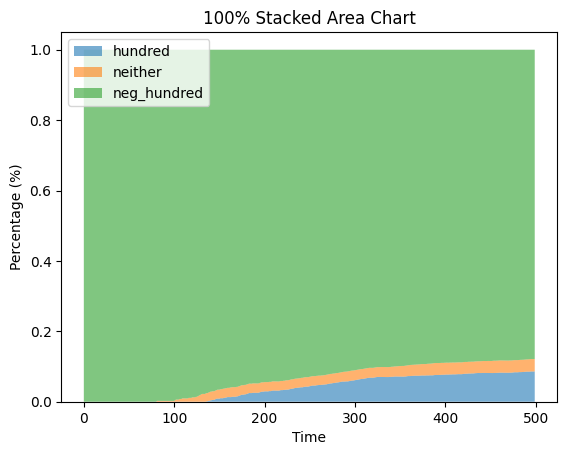

In [4]:
want_visual = True
if want_visual:
    env = gym.make('LunarLander-v3', render_mode='human')
else:
    env = gym.make('LunarLander-v3')

test_episodes = 10
start_time_sec = time.time()
test_rewards = []
for ep in range(test_episodes):
    state, _ = env.reset()
    terminated, truncated = False, False
    ep_rewards = []
    while (not terminated) and (not truncated):
        action = agent.get_action(state)
        nxt_stp, rwd, terminated, truncated, info = env.step(action)
        ep_rewards.append(rwd)
        if truncated or terminated:
            break
        state = nxt_stp
    ep_rewards.append(rwd)

env.close()
test_time_sec = time.time() - start_time_sec
print(f"Testing time: {(test_time_sec * 1000): .2f}")
agent.save_models(
    train_time=train_time_sec, 
    test_time=test_time_sec/test_episodes, 
    test_scores=[ep[-1] for ep in test_rewards], 
    reward_full=reward_full
)